# **Handwritten Digit Recognition using Neural Networks**

This project demonstrates the implementation of a neural network model to recognize handwritten digits using the MNIST dataset. The MNIST dataset is a well-known benchmark dataset in the field of machine learning and computer vision, consisting of 70,000 grayscale images of handwritten digits (0-9) with a resolution of 28x28 pixels.
![Digit Recognition](https://miro.medium.com/v2/resize:fit:372/1*AO2rIhzRYzFVQlFLx9DM9A.png)

- This project serves as a basic introduction to deep learning with TensorFlow, highlighting how neural networks can be applied to solve image classification problems.



In [49]:
import os
import cv2
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## **Project Overview:**

###**Data Loading and Preprocessing**
   - The dataset is split into training and testing sets.
   - The images are normalized to improve the performance of the neural network.

In [50]:
mnist=tf.keras.datasets.mnist

In [51]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [52]:
X_train=tf.keras.utils.normalize(X_train,axis=1)
X_test=tf.keras.utils.normalize(X_test,axis=1)

###**Model Creation:**
   - A sequential model is built using TensorFlow's Keras API, consisting of a flattening layer, two dense layers with ReLU activation, and a final dense layer with softmax activation for classification.

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Model initialization
model = Sequential()

# Adding layers
model.add(Flatten(input_shape=(28, 28)))  # Use 'Flatten' with a capital 'F'
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compiling the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


###**Model Training**
   - The model is compiled with the Adam optimizer and trained on the normalized training data for 20 epochs.

In [54]:
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8820 - loss: 0.4010
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9720 - loss: 0.0915
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9821 - loss: 0.0562
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9874 - loss: 0.0397
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9902 - loss: 0.0286
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9919 - loss: 0.0248
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9950 - loss: 0.0164
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9947 - loss: 0.0154
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9959 - loss: 0.0125
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9963 - loss: 0.0105
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9955 - loss: 0.0135
Epoch 12/20
1875/1875 

In [55]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 807,968 (3.08 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 538,646 (2.05 MB)

###**Saving and Loading the Model**
   - The trained model is saved to a file and can be reloaded later for predictions.

In [57]:
model.save('handwritten.h5')


In [58]:
model=tf.keras.models.load_model('handwritten.h5')

###**Model Evaluation:**
   - After training, the model is evaluated on the test set to determine its accuracy and loss.


In [59]:
loss, accuracy =model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9684 - loss: 0.1911


###**Handwritten Digit Prediction:**
   - The saved model is used to predict digits from external images, displaying the results along with the corresponding images.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
This digits is probably a 0


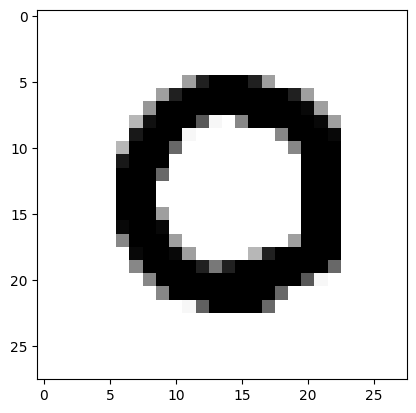

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
This digits is probably a 1


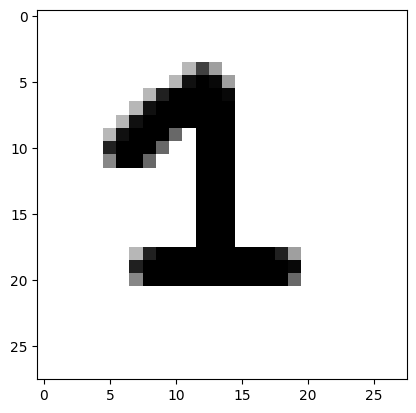

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
This digits is probably a 1


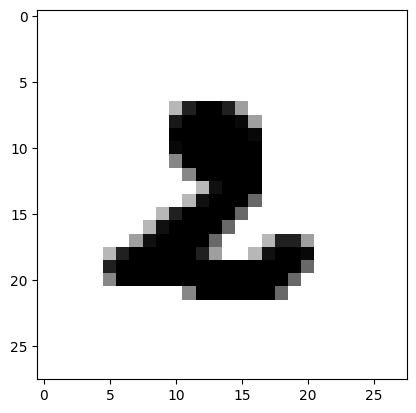

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
This digits is probably a 3


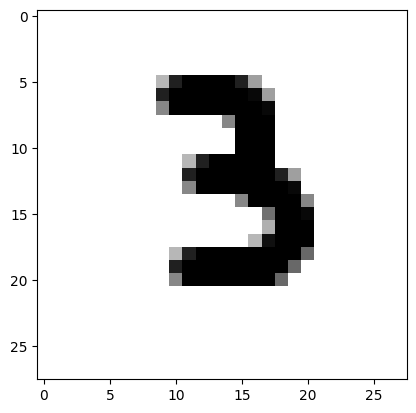

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
This digits is probably a 1


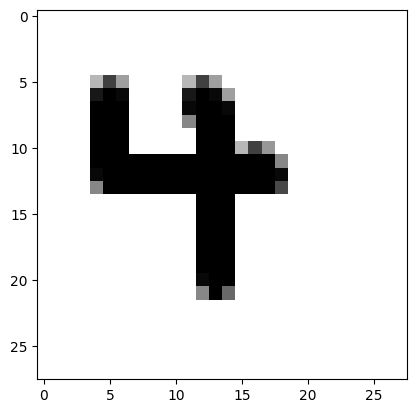

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
This digits is probably a 5


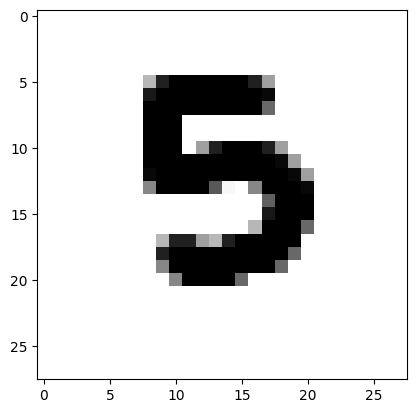

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
This digits is probably a 6


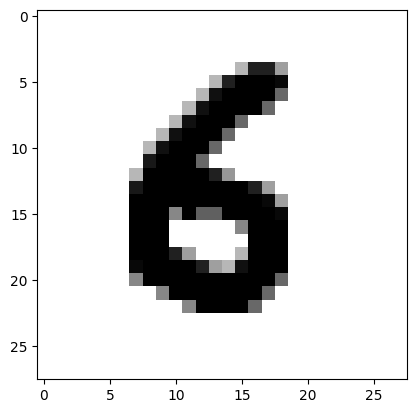

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
This digits is probably a 7


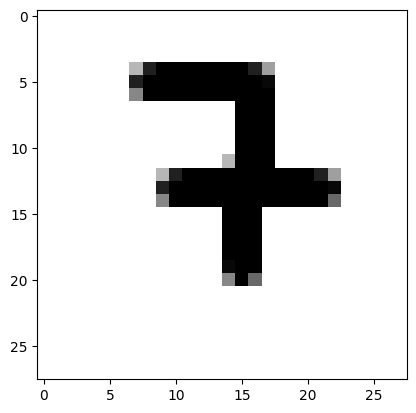

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
This digits is probably a 8


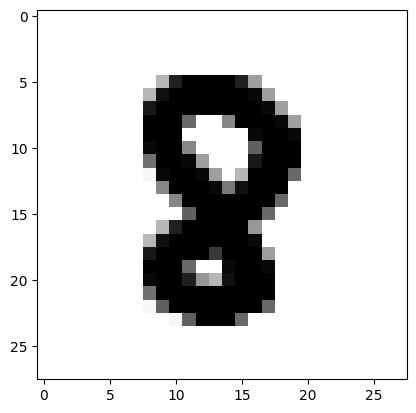

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
This digits is probably a 9


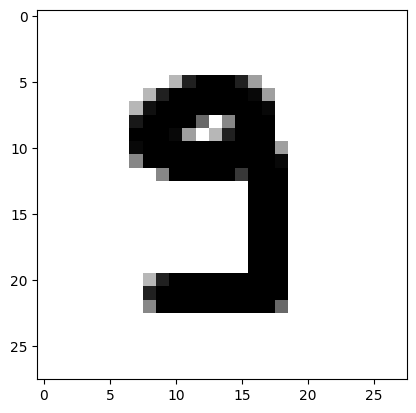

In [69]:
image_number=0
while os.path.isfile(f"digits/{image_number}.png"):
  try:
      img = cv2.imread(f"digits/{image_number}.png")[:,:,0]
      img = np.invert(np.array([img]))
      prediction = model.predict(img)
      print(f"This digits is probably a {np.argmax(prediction)}")
      plt.imshow(img[0],cmap = plt.cm.binary)
      plt.show()
  except:
      print("grrr")
  finally:
      image_number +=1
